![logo](https://github.com/cristiandarioortegayubro/BA/blob/main/dba.png?raw=true)

# **Trabajo Final - Módulo 10 - Aprendizaje Automático - Machine Learning - Regresión**

![logo](https://www.python.org/static/community_logos/python-powered-w-100x40.png)

GOMEZ OCAMPO MATIAS
~~~

**En virtud del DataFrame propuesto, generar un modelo de regresión para predecir el precio de viviendas de Argentina:**

- **l1** - país
- **l2** - provincia o ciudad
- **l3** - barrio
- **rooms** - cantidad de habitaciones
- **bedrooms** - cantidad de dormitorios
- **bathrooms** - cantidad de baños
- **surface_total** - superficie total
- **surface_covered** - superficie cubierta
- **price** - precio

# **Carga de módulos y datos necesarios**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

# **Creación del DataFrame**

In [2]:
url="https://raw.githubusercontent.com/cristiandarioortegayubro/BA/main/Datasets/"
archivo ="propiedades.csv"
df = pd.read_csv(url+archivo, index_col=0)

In [3]:
df.head()

,id,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
0,0,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,80.0,NaN,235000
1,1,Argentina,Capital Federal,Belgrano,NaN,NaN,1.0,NaN,40.0,105000
2,2,Argentina,Capital Federal,San Telmo,1.0,NaN,1.0,34.0,31.0,109183
3,3,Argentina,Capital Federal,Villa Urquiza,2.0,NaN,1.0,NaN,51.0,110000
4,4,Argentina,Capital Federal,Belgrano,6.0,4.0,2.0,190.0,178.0,550000


# **Generación del modelo de regresión**

## ***Análisis exploratorio de datos*** 




Previo a la generación del modelo realizamos un análisis del dataframe.
Como dicen los rusos "don't trust, verify"

In [4]:
df.info() #observamos los datos categóricos y numéricos del df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44678 entries, 0 to 44677
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               44678 non-null  int64  
 1   l1               44678 non-null  object 
 2   l2               44678 non-null  object 
 3   l3               44382 non-null  object 
 4   rooms            43547 non-null  float64
 5   bedrooms         38623 non-null  float64
 6   bathrooms        43371 non-null  float64
 7   surface_total    39856 non-null  float64
 8   surface_covered  40641 non-null  float64
 9   price            44678 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 3.7+ MB


In [5]:
df.shape

(44678, 10)

## **Eliminamos las variables que no son relevantes para el modelo**




In [6]:
df.drop(columns=["id","l1","l2"], inplace=True) #eliminamos el que no se utiliza nunca Id, el país y la provincia

## **Rename columns para una mejor compresión del df**

In [7]:
df =       df.rename(columns={
          'l3':'barrio',
          'rooms':'habitaciones',
          'bedrooms':'dormitorios',
          'bathrooms':'baños',
          'surface_total':'superficie_total',
          'surface_covered':'superficie_cubierta',
          'price':'precio'
         })

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44678 entries, 0 to 44677
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   barrio               44382 non-null  object 
 1   habitaciones         43547 non-null  float64
 2   dormitorios          38623 non-null  float64
 3   baños                43371 non-null  float64
 4   superficie_total     39856 non-null  float64
 5   superficie_cubierta  40641 non-null  float64
 6   precio               44678 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [9]:
df.isnull().sum().sort_values(ascending=False) #datos nulos

dormitorios            6055
superficie_total       4822
superficie_cubierta    4037
baños                  1307
habitaciones           1131
barrio                  296
precio                    0
dtype: int64

In [10]:
df.isnull().mean().sort_values(ascending=False) #media de los datos nulos, no estamos tan graves

dormitorios            0.135525
superficie_total       0.107928
superficie_cubierta    0.090358
baños                  0.029254
habitaciones           0.025314
barrio                 0.006625
precio                 0.000000
dtype: float64

In [11]:
df.dropna(how='any', axis=0, inplace = True) #dropeo los nulos

## **Convertimos los datos categóricos**

In [12]:
df = pd.get_dummies(df, drop_first = True )

In [13]:
px.box(df,
       x = df.precio,
       template = "gridon")

Sacó los outliers, tomando como límite el upper fence del gráfico de boxplot

In [14]:
df.drop(df[df.precio > 640000].index, axis=0, inplace = True)

In [15]:
df.shape

(29117, 62)

## ***Instalación de PyCaret***

In [16]:
!pip install --pre pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## **División del dataframe**

In [17]:
data = df.sample(frac=0.8, random_state=123)
data_no_vistos = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_no_vistos.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_no_vistos.shape))

Data for Modeling: (23294, 62)
Unseen Data For Predictions (5823, 62)


## **Configuración PyCaret**

In [18]:
from pycaret.regression import *
from pycaret.regression.oop import *
LOGGER.disabled = True

In [19]:
regresion = setup(data = data, 
                  target = "precio", 
                  session_id=2022, 
                 )

,Description,Value
0,session_id,2022
1,Target,precio
2,Original Data,"(23294, 62)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(16305, 61)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='precio',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluster_all', 'passthrough'),
              

In [20]:
mejor_modelo_01 = compare_models(n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,35112.3599,2.601213e+09,50981.7439,0.8377,0.2240,0.1817,3.908
rf,Random Forest Regressor,33432.5020,2.615947e+09,51125.8240,0.8367,0.2257,0.1740,6.483
xgboost,Extreme Gradient Boosting,35020.0520,2.637843e+09,51344.6441,0.8355,0.2253,0.1810,3.548
lightgbm,Light Gradient Boosting Machine,35637.7733,2.666535e+09,51624.9499,0.8336,0.2282,0.1854,0.233
et,Extra Trees Regressor,33334.0778,2.767016e+09,52567.0996,0.8272,0.2311,0.1725,6.880
gbr,Gradient Boosting Regressor,38358.6685,3.022577e+09,54959.6444,0.8115,0.2444,0.2026,1.576
lr,Linear Regression,43063.1881,3.762967e+09,61323.2383,0.7651,0.2827,0.2322,0.463
lasso,Lasso Regression,43048.1674,3.762787e+09,61321.8571,0.7651,0.2822,0.2320,0.383
ridge,Ridge Regression,43033.9097,3.762849e+09,61322.4232,0.7651,0.2823,0.2318,0.029
br,Bayesian Ridge,43014.9348,3.763259e+09,61325.8146,0.7651,0.2808,0.2315,0.096


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:[<catboost.core.CatBoostRegressor object at 0x7f236ea3ff10>, RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=2022, verbose=0, warm_start=False), XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_c

In [32]:
modelo_01 = create_model ("lightgbm")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35075.5816,2.562491e+09,50621.0490,0.8450,0.2231,0.1794
1,35466.6752,2.606622e+09,51055.0873,0.8422,0.2266,0.1845
2,33987.5406,2.455991e+09,49557.9569,0.8491,0.2358,0.1918
3,35151.3168,2.552417e+09,50521.4525,0.8414,0.2255,0.1809
4,35699.5548,2.611283e+09,51100.7104,0.8287,0.2235,0.1819
5,35617.7637,2.673717e+09,51707.9950,0.8289,0.2356,0.1894
6,35166.5249,2.663090e+09,51605.1313,0.8438,0.2249,0.1833
7,35052.7152,2.579557e+09,50789.3348,0.8387,0.2264,0.1841
8,34071.0237,2.466956e+09,49668.4585,0.8494,0.2207,0.1806


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 7
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [33]:
optimizar_modelo_01= tune_model(modelo_01)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,35110.8425,2.680179e+09,51770.4474,0.8379,0.2251,0.1802
1,34573.3164,2.579457e+09,50788.3501,0.8438,0.2247,0.1794
2,33999.6004,2.458701e+09,49585.2886,0.8489,0.2377,0.1922
3,34849.1084,2.598994e+09,50980.3310,0.8385,0.2255,0.1782
4,35605.7152,2.608263e+09,51071.1577,0.8289,0.2247,0.1817
5,35186.4229,2.609463e+09,51082.9076,0.8330,0.2338,0.1864
6,34969.8839,2.646031e+09,51439.5862,0.8448,0.2247,0.1809
7,35018.0694,2.642375e+09,51404.0349,0.8347,0.2288,0.1842
8,33976.7782,2.488309e+09,49882.9556,0.8481,0.2171,0.1771


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 8
INFO:logs:LGBMRegressor(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.4, max_depth=-1,
              min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
              random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
              silent='warn', subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [34]:
predict_model(modelo_01)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,35553.3958,2.688413e+09,51849.9113,0.8295,0.2266,0.1831


,habitaciones,dormitorios,baños,superficie_total,superficie_cubierta,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,barrio_Barrio Norte,...,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque,precio,Label
0,-0.668297,-1.047826,-0.721465,0.902307,-0.287228,0,0,0,0,0,...,0,0,0,0,0,0,0,0,199000,206265.820939
1,1.148608,1.256188,1.287484,1.259413,1.481301,0,0,1,0,0,...,0,0,0,0,0,0,0,0,205000,210497.107802
2,0.354402,0.442252,1.287484,1.491525,0.168428,0,0,0,0,0,...,0,0,0,0,0,0,0,0,220000,287980.958494
3,0.354402,0.442252,1.287484,0.207560,0.205477,0,0,0,0,0,...,0,0,0,0,0,0,0,0,259000,221450.296788
4,2.431330,1.811772,1.832093,2.260721,2.270720,0,0,0,0,0,...,0,0,0,0,0,0,0,0,425000,518929.518020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8731,0.354402,0.442252,1.287484,1.259413,1.151478,0,0,0,0,0,...,0,0,0,0,0,0,0,0,630000,398616.988568
8732,-0.668297,-1.047826,-0.721465,-0.099015,-0.526105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,159900,194827.280936
8733,1.148608,1.256188,-0.721465,1.129099,0.013200,0,0,0,0,0,...,0,0,0,0,0,0,0,0,115000,193580.835986
8734,-0.668297,-1.047826,-0.721465,-0.368964,-0.110911,0,0,0,0,0,...,0,0,0,0,0,0,0,0,185000,176502.051877


In [35]:
evaluate_model(modelo_01)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **PyCaret con Normalización y Transformación**

In [24]:
regresion = setup(data = df, 
                  target = "precio", 
                  session_id=123, 
                  normalize = True,
                  transformation = True,
                  )

,Description,Value
0,session_id,123
1,Target,precio
2,Original Data,"(29117, 62)"
3,Missing Values,False
4,Numeric Features,61
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(20381, 61)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='precio',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy=...
                                                  random_state_quantile=123,
                                                  target='precio')),
                ('binn', 'passthrough'), ('rem_outliers', 'passthr

In [25]:
mejor_modelo02 = compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,31977.9327,2.438980e+09,4.937375e+04,0.8485,0.2200,0.1686,9.620
catboost,CatBoost Regressor,34252.6743,2.478098e+09,4.977597e+04,0.8460,0.2207,0.1785,5.847
xgboost,Extreme Gradient Boosting,34176.5699,2.513456e+09,5.012859e+04,0.8438,0.2225,0.1779,4.683
et,Extra Trees Regressor,31566.4053,2.518083e+09,5.016522e+04,0.8436,0.2241,0.1661,8.955
lightgbm,Light Gradient Boosting Machine,35016.3457,2.577046e+09,5.076010e+04,0.8398,0.2264,0.1834,0.495
knn,K Neighbors Regressor,35487.3099,2.791275e+09,5.282032e+04,0.8266,0.2325,0.1844,0.707
gbr,Gradient Boosting Regressor,37956.7107,2.974758e+09,5.453146e+04,0.8152,0.2438,0.2014,1.978
dt,Decision Tree Regressor,36961.7914,3.665439e+09,6.051078e+04,0.7724,0.2605,0.1896,0.157
lasso,Lasso Regression,44836.2091,3.725191e+09,6.102482e+04,0.7687,0.4254,0.2530,0.494
ridge,Ridge Regression,44831.8422,3.725181e+09,6.102465e+04,0.7687,0.4275,0.2529,0.042


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 2
INFO:logs:[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False), <catboost.core.CatBoostRegressor object at 0x7f236eaa9e10>, XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_co

## **Blend models**

In [26]:
blender = blend_models(estimator_list = [
                                            mejor_modelo02[0], 
                                            mejor_modelo02[1], 
                                            mejor_modelo02[2]])
                                           

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,32503.9983,2.312079e+09,48084.0808,0.8602,0.2114,0.1673
1,32526.1352,2.254199e+09,47478.4085,0.8635,0.2105,0.1688
2,31430.2185,2.133390e+09,46188.6301,0.8689,0.2224,0.1787
3,32670.4741,2.271641e+09,47661.7339,0.8588,0.2108,0.1671
4,32722.1967,2.308811e+09,48050.0863,0.8486,0.2076,0.1660
5,32562.8753,2.296729e+09,47924.1981,0.8530,0.2190,0.1725
6,32950.4050,2.410910e+09,49101.0148,0.8586,0.2118,0.1703
7,32396.4254,2.307422e+09,48035.6322,0.8557,0.2122,0.1702
8,31633.9545,2.247393e+09,47406.6794,0.8628,0.2062,0.1654


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 3
INFO:logs:VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_l

## **Predicciones**

In [27]:
predict_model(blender, data=data)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,27728.4966,1.690981e+09,41121.5362,0.8945,0.1858,0.1458


,habitaciones,dormitorios,baños,superficie_total,superficie_cubierta,precio,barrio_Agronomía,barrio_Almagro,barrio_Balvanera,barrio_Barracas,...,barrio_Villa Luro,barrio_Villa Ortuzar,barrio_Villa Pueyrredón,barrio_Villa Real,barrio_Villa Riachuelo,barrio_Villa Santa Rita,barrio_Villa Soldati,barrio_Villa Urquiza,barrio_Villa del Parque,Label
0,2.0,1.0,1.0,100.0,53.0,199000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,209307.588559
1,4.0,3.0,2.0,120.0,120.0,205000,0,0,1,0,...,0,0,0,0,0,0,0,0,0,236834.253807
2,3.0,2.0,2.0,137.0,64.0,220000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,267763.555826
3,3.0,2.0,2.0,73.0,65.0,259000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,236656.327567
4,6.0,4.0,4.0,264.0,245.0,425000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,527203.522260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23289,2.0,1.0,1.0,47.0,39.0,110000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,103139.706595
23290,3.0,3.0,2.0,80.0,80.0,245000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,334521.180763
23291,4.0,3.0,1.0,77.0,71.0,225000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,218740.335073
23292,2.0,1.0,1.0,50.0,47.0,74500,0,0,0,0,...,0,0,0,0,0,0,0,0,0,101642.915917


In [28]:
prediccion = predict_model(blender, data=data)
prediccion[['habitaciones','dormitorios','baños','precio','Label']]

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,27728.4966,1.690981e+09,41121.5362,0.8945,0.1858,0.1458


,habitaciones,dormitorios,baños,precio,Label
0,2.0,1.0,1.0,199000,209307.588559
1,4.0,3.0,2.0,205000,236834.253807
2,3.0,2.0,2.0,220000,267763.555826
3,3.0,2.0,2.0,259000,236656.327567
4,6.0,4.0,4.0,425000,527203.522260
...,...,...,...,...,...
23289,2.0,1.0,1.0,110000,103139.706595
23290,3.0,3.0,2.0,245000,334521.180763
23291,4.0,3.0,1.0,225000,218740.335073
23292,2.0,1.0,1.0,74500,101642.915917


## ***Predicción sobre datos no vistos***

In [29]:
prediccion_02 = predict_model(blender, data=data_no_vistos)
prediccion_02[['habitaciones','dormitorios','baños','precio','Label']]

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,24104.3172,1.210934e+09,34798.4779,0.9241,0.1632,0.1289


,habitaciones,dormitorios,baños,precio,Label
0,2.0,1.0,1.0,132000,118698.068970
1,2.0,1.0,1.0,99000,128177.786152
2,2.0,1.0,1.0,148400,175664.928434
3,1.0,1.0,1.0,75000,82864.128186
4,3.0,2.0,2.0,205000,235229.701505
...,...,...,...,...,...
5818,1.0,1.0,1.0,54000,63168.991318
5819,2.0,1.0,1.0,120000,133082.980289
5820,2.0,1.0,1.0,115000,126663.868410
5821,1.0,1.0,1.0,105000,137653.082924


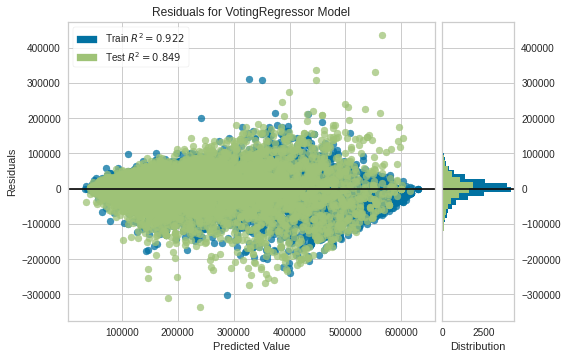

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [30]:
plot_model(blender)

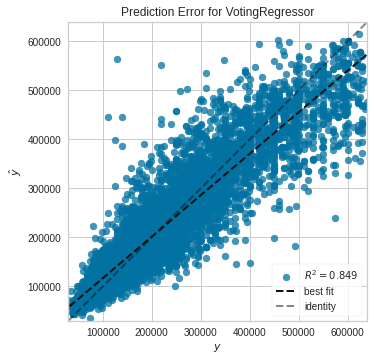

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [31]:
plot_model(blender, plot = 'error')

# **Conclusiones**

PyCaret se comió la RAM en este TP.

Para arrancar desarolle un modelo Light Gradient Boosting Machine porque era el que tenía el R2 más alto con el procesamiento más rápido, particularmente en este TP PyCaret me corrió superlento, por los datos que puedo ver a la hora de evaluar el modelo los datos del R2 de prueba y entrenamiento me dan bastante aceptables al igual que las otras métricas.

Después probé hacer un ensamble (mix de algoritmos) y si bien mejora el R2 puedo observar en el gráfico que el R2 de entrenamiento y el de prueba son diferentes, esto nos da la pauta de que la variable objetivo no es independiente.